In [7]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    
plot_dir = './' 

ps = 0

Populating the interactive namespace from numpy and matplotlib


In [8]:
import calc_enrich
#reload(calc_enrich)
from calc_enrich import calc_del_U
from calc_enrich import Npc_from_Nstages
from calc_enrich import Nwc_from_Nstages
from calc_enrich import calc_feed_flows
from calc_enrich import find_N_stages
from calc_enrich import design_cascade

In [9]:
# centrifuge params 
#omega = 64000
#d = 0.1  # m 
#Z = 2.0   # m
#F_m_hrs = 70 # grams/hr  
#T = 320.0   # K
#cut = 0.5
eff = 1.0 # centrifuge efficiency

d = 0.15  # m 
Z = 0.5   # m
F_m_hrs = 15*60*60/(1e3) # grams/hr  
T = 320.0# K
cut = 0.5
omega = 485/(d/2)

# cascade params
Nfc = 0.0071
Npc = 0.035
Nwc = 0.003
Fc_month = 100 #kg/month

# The feed enrichment to be used when using a cascade designed for LEU to produce HEU.
Nfc_mod = 0.20
Fc_month_mod = Fc_month #kg/month
#Fc_month_mod = 46 #kg/month

#unit conversions
kg_sec2kg_month = 30.4*24*60*60
v_a = omega * (d/2.0)
F_m = F_m_hrs/(60*60*1000.0)
Fc = Fc_month/kg_sec2kg_month
Fc_mod = Fc_month_mod/kg_sec2kg_month

# Comparison numbers (not needed for calculations)
del_U_th_yr = 1.1 #swu/yr
del_U_obs_yr = 0.71 #Swu/yr
del_U_th = del_U_th_yr/(365.25*24*60*60) #kgSWU/sec
del_U_obs = del_U_obs_yr/(365.25*24*60*60)

Pc_month = 77 #kg/month
Pc = Pc_month/kg_sec2kg_month

qty_len = 8
assay_len = 4

In [10]:
print("v_a ", v_a, " Z ", Z, " d ", d, " F_m ", F_m, " T ", T, " cut ", cut, " eff ", eff)

alpha, del_U, del_U_yr, dirac = calc_del_U(v_a, Z, d, F_m, T, cut, eff)

print(alpha, del_U)

v_a  485.0  Z  0.5  d  0.15  F_m  1.5e-05  T  320.0  cut  0.5  eff  1.0
1.16321031431 7.03232816847e-08


In [79]:
alpha, del_U, del_U_yr, dirac = calc_del_U(v_a, Z, d, F_m, T, cut, eff)

# Find the number of stages needed for enriching and stripping 
# (don't use the stages_per_cascade fn because it only works when alpha is close to 1)

ideal_enrich_stage, ideal_strip_stage = find_N_stages(alpha, Nfc, Npc, Nwc)
feed_flows = calc_feed_flows(ideal_enrich_stage, ideal_strip_stage, Fc, cut)
all_stages, n_machines = design_cascade(cut, alpha, del_U, Nfc, feed_flows, ideal_enrich_stage, ideal_strip_stage,
                                        verbose=True, pretty=True, qty_len=qty_len)
print( "total machines", n_machines)


Stage   #Mach	 Feed    Product  Waste	 F_assay 	P_assay W_assay
0 	 56 	 776.47   388.24    388.24   0.0071 	 0.0082 	 0.0061
1 	 51 	 705.88   352.94    352.94   0.0082 	 0.0096 	 0.0071
2 	 46 	 635.29   317.65    317.65   0.0096 	 0.0111 	 0.0082
3 	 41 	 564.71   282.35    282.35   0.0111 	 0.0129 	 0.0096
4 	 36 	 494.12   247.06    247.06   0.0129 	 0.015 	 0.0111
5 	 31 	 423.53   211.76    211.76   0.015 	 0.0174 	 0.0129
6 	 26 	 352.94   176.47    176.47   0.0174 	 0.0202 	 0.015
7 	 21 	 282.35   141.18    141.18   0.0202 	 0.0234 	 0.0174
8 	 16 	 211.76   105.88    105.88   0.0234 	 0.0271 	 0.0202
9 	 11 	 141.18   70.59    70.59   0.0271 	 0.0314 	 0.0234
10 	 6 	 70.59   35.29    35.29   0.0314 	 0.0364 	 0.0271
-1 	 47 	 647.06    323.53   323.53    0.0061 	 0.0071 	 0.0053
-2 	 38 	 517.65    258.82   258.82    0.0053 	 0.0061 	 0.0045
-3 	 28 	 388.24    194.12   194.12    0.0045 	 0.0053 	 0.0039
-4 	 19 	 258.82    129.41   129.41    0.0039 	 0.0045 	 0.0033
-5 	 1

In [80]:
tot_flow = 0
p_last = 0
w_next = 0
for i in range(len(all_stages)):
    if (i == 0):
        p_last = 0
    else:
        p_last = all_stages[i-1][3]
    if (i == len(all_stages)-1):
        w_next = 0
    else:
        w_next = all_stages[i+1][4]
    # If on stage zero then add feed also
    if (i == (ideal_strip_stage)):
        tot_flow = p_last+w_next+Fc
    else:
        tot_flow =  p_last+w_next
    n_machine = all_stages[i][1]
    print( "stage", i - ideal_strip_stage,"Predicted flow ", feed_flows[i]," actual flow ", tot_flow, " flow per machine ", tot_flow/n_machine)


stage -5 Predicted flow  4.92704391698e-05  actual flow  4.92704391698e-05  flow per machine  4.92704391698e-06
stage -4 Predicted flow  9.85408783396e-05  actual flow  9.85408783396e-05  flow per machine  5.18636201788e-06
stage -3 Predicted flow  0.000147811317509  actual flow  0.000147811317509  flow per machine  5.27897562534e-06
stage -2 Predicted flow  0.000197081756679  actual flow  0.000197081756679  flow per machine  5.18636201788e-06
stage -1 Predicted flow  0.000246352195849  actual flow  0.000246352195849  flow per machine  5.2415360819e-06
stage 0 Predicted flow  0.000295622635019  actual flow  0.000295622635019  flow per machine  5.27897562534e-06
stage 1 Predicted flow  0.000268747850017  actual flow  0.000268747850017  flow per machine  5.26956568661e-06
stage 2 Predicted flow  0.000241873065015  actual flow  0.000241873065015  flow per machine  5.25811010903e-06
stage 3 Predicted flow  0.000214998280014  actual flow  0.000214998280014  flow per machine  5.24386048814e-

In [17]:
## Check that mass is conserved in the cascade

final_w = all_stages[0][4]
final_p = all_stages[len(all_stages)-1][3]
#final_f = round(Fc,qty_len)
final_f = Fc

res = final_f - final_p - final_w
print( "Casc. F (kg/s)  Casc. P\t\tCasc. W\t\t (P+W)/F")
print(  final_f, "\t", final_p, "\t", final_w, "\t", (final_p+final_w)/final_f)

Casc. F (kg/s)  Casc. P		Casc. W		 (P+W)/F
3.8072612085769985e-05 	 1.34373925009e-05 	 2.46352195849e-05 	 1.0


In [18]:
## Determine cascade production rate for off-design use

Npc_mod = Npc_from_Nstages(alpha, Nfc_mod, ideal_enrich_stage)
Nwc_mod = Nwc_from_Nstages(alpha, Nfc_mod, ideal_strip_stage)

feed_flow_mod = calc_feed_flows(ideal_enrich_stage, ideal_strip_stage, Fc_mod, cut)

mod_stages, n_m = design_cascade(cut, alpha, del_U, Nfc_mod, feed_flow_mod, ideal_enrich_stage,
                                 ideal_strip_stage, verbose=True, pretty=True, qty_len=qty_len)


Stage   #Mach	 Feed    Product  Waste	 F_assay 	P_assay W_assay
0 	 56 	 776.47   388.24    388.24   0.2 	 0.2253 	 0.1769
1 	 51 	 705.88   352.94    352.94   0.2253 	 0.2528 	 0.2
2 	 46 	 635.29   317.65    317.65   0.2528 	 0.2824 	 0.2253
3 	 41 	 564.71   282.35    282.35   0.2824 	 0.314 	 0.2528
4 	 36 	 494.12   247.06    247.06   0.314 	 0.3474 	 0.2824
5 	 31 	 423.53   211.76    211.76   0.3474 	 0.3824 	 0.314
6 	 26 	 352.94   176.47    176.47   0.3824 	 0.4187 	 0.3474
7 	 21 	 282.35   141.18    141.18   0.4187 	 0.4559 	 0.3824
8 	 16 	 211.76   105.88    105.88   0.4559 	 0.4936 	 0.4187
9 	 11 	 141.18   70.59    70.59   0.4936 	 0.5313 	 0.4559
10 	 6 	 70.59   35.29    35.29   0.5313 	 0.5687 	 0.4936
-1 	 47 	 647.06    323.53   323.53    0.1769 	 0.2 	 0.156
-2 	 38 	 517.65    258.82   258.82    0.156 	 0.1769 	 0.1371
-3 	 28 	 388.24    194.12   194.12    0.1371 	 0.156 	 0.1201
-4 	 19 	 258.82    129.41   129.41    0.1201 	 0.1371 	 0.1051
-5 	 10 	 129.41  

In [19]:
## Design Cascade based on available number of centrifuges, determine max Fc
max_centrifuges = 1000
curr_feed = Fc
optimal_feed = Fc
step_size = 1.05  # MUST be a number Greater than 1. 
step = 1
print( "alpha ", alpha)
ideal_enrich_stage, ideal_strip_stage = find_N_stages(alpha, Nfc, Npc, Nwc)
feed_flows = calc_feed_flows(ideal_enrich_stage, ideal_strip_stage, curr_feed, cut)
all_stages, n_centrifuges = design_cascade(cut, alpha, del_U, Nfc, feed_flows, ideal_enrich_stage, ideal_strip_stage)

optimum_number = False
neg_inc = False
pos_inc = False

if (n_centrifuges < max_centrifuges):
    pos_inc = True
    step = step_size
elif (n_centrifuges > max_centrifuges):
    neg_inc = True
    step = 1.0/step_size
else:
    optimum_number = True
ntries=0
print( "step size is", step)
while (optimum_number == False) and (ntries < 100):
    ntries+=1
    last_feed = curr_feed
    curr_feed *= step
    feed_flows = calc_feed_flows(ideal_enrich_stage, ideal_strip_stage, curr_feed, cut)
    all_stages, n_centrifuges = design_cascade(cut, alpha, del_U, Nfc, feed_flows, ideal_enrich_stage, 
                                               ideal_strip_stage)
    print( "curr try", ntries, "Tot mach", n_centrifuges, "# in last stage: ", all_stages[-1][1])
    if (all_stages[-1][1] < 1):
        print( "not enough centrifuges to fill all stages")
        optimum_number = True
        optimal_feed = last_feed
    elif (neg_inc == True) and (n_centrifuges < max_centrifuges):
        optimum_number = True
        optimal_feed = curr_feed
        print( "reduced flow to correct #", n_centrifuges)
    elif (pos_inc == True) and (n_centrifuges > max_centrifuges):
        optimum_number = True
        optimal_feed = last_feed
        print( "increased flow to correct #", n_centrifuges)

final_feed_flows = calc_feed_flows(ideal_enrich_stage, ideal_strip_stage, optimal_feed, cut)
final_stages, final_n_mach = design_cascade(cut, alpha, del_U, Nfc, final_feed_flows, 
                                            ideal_enrich_stage, ideal_strip_stage, verbose=True, pretty=True)
print( "Cascade can process ", optimal_feed*kg_sec2kg_month, " kg/month")
print( "Final total machines", final_n_mach)
print( final_stages[:][3])

alpha  1.16321031431
step size is 1.05
curr try 1 Tot mach 508 # in last stage:  6
curr try 2 Tot mach 533 # in last stage:  6
curr try 3 Tot mach 559 # in last stage:  6
curr try 4 Tot mach 587 # in last stage:  7
curr try 5 Tot mach 612 # in last stage:  7
curr try 6 Tot mach 647 # in last stage:  7
curr try 7 Tot mach 678 # in last stage:  8
curr try 8 Tot mach 712 # in last stage:  8
curr try 9 Tot mach 745 # in last stage:  8
curr try 10 Tot mach 784 # in last stage:  9
curr try 11 Tot mach 820 # in last stage:  9
curr try 12 Tot mach 863 # in last stage:  10
curr try 13 Tot mach 904 # in last stage:  10
curr try 14 Tot mach 950 # in last stage:  11
curr try 15 Tot mach 997 # in last stage:  11
curr try 16 Tot mach 1047 # in last stage:  12
increased flow to correct # 1047
Stage   #Mach	 Feed    Product  Waste	 F_assay 	P_assay W_assay
0 	 117 	 1614.23   807.11    807.11   0.0071 	 0.0082 	 0.0061
1 	 106 	 1467.48   733.74    733.74   0.0082 	 0.0096 	 0.0071
2 	 96 	 1320.73   

In [36]:
1614.23*0.0071

11.461033

In [37]:
+807.11*(0.0082+0.0061)

11.541673000000001

In [38]:
1345.19*0.0061 

8.205659

In [40]:
807.11+538.08

1345.19

In [39]:
672.59*(0.0071+0.0053)

8.340116000000002

In [23]:
## A cascade with a fixed number of centrifuges has a maximum flow rate already defined
## This flow rate and production does not change with change to feed assay. Therefore the
## only things that change with a modified cascade are the product and waste assays

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


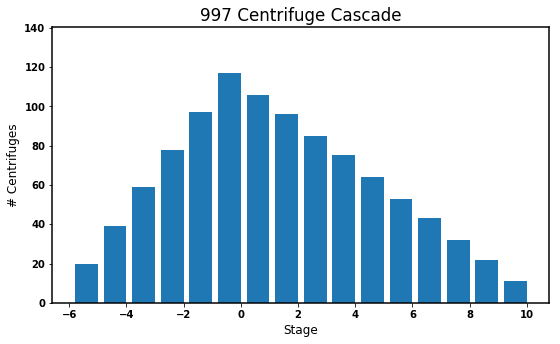

In [24]:
all_stages = []

for s in range(len(final_stages)):
    all_stages.append([final_stages[s][0],final_stages[s][1]])

fs = np.array(all_stages)
bar_width = 0.8
bar_res = plt.bar(fs[:,0]-0.4, fs[:,1], bar_width)

plt.xlabel('Stage')
plt.ylabel('# Centrifuges')
plt.title(str(int(final_n_mach)) + " Centrifuge Cascade")
plt.legend()
plt.ylim((0,1.2*fs[:,1].max()))
plt.tight_layout()

if ps == 1:
    savefig(plot_dir + 'cascade_design.png')

plt.show()


In [22]:
117+106+96+85+75+64+53+43+32+22+11+97+78+59+39+20

997

In [38]:
(1614.23-672.59-733.74)

207.89999999999998

In [41]:
73.37+134.52

207.89000000000001

In [54]:
(134.52+50)*0.0029# Tails

0.535108

In [55]:
(73.37 - 50)*0.0364 # Product

0.8506680000000002

In [53]:
207.89999999999998*0.0071 # Feed 

1.47609

In [46]:
F_m

1.5e-05

In [57]:
4.92704391698e-05 /10.

4.92704391698e-06

In [58]:
0.5e-5

5e-06

In [59]:
all_stages

[[-5, 20],
 [-4, 39],
 [-3, 59],
 [-2, 78],
 [-1, 97],
 [0, 117],
 [1, 106],
 [2, 96],
 [3, 85],
 [4, 75],
 [5, 64],
 [6, 53],
 [7, 43],
 [8, 32],
 [9, 22],
 [10, 11]]